In [ ]:
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

## 🐶End-to-end Multil-class Dog Breed Classification
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.
## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.
# 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data
# 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
# 4. Features
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

## Getting our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# import TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ",tf.__version__)
print("TF Hub Version: ",hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF Version:  2.2.0
TF Hub Version:  0.8.0
GPU available


### Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [ ]:
print(labels_csv["breed"].describe())

count                  10222
unique                   120
top       scottish_deerhound
freq                     126
Name: breed, dtype: object


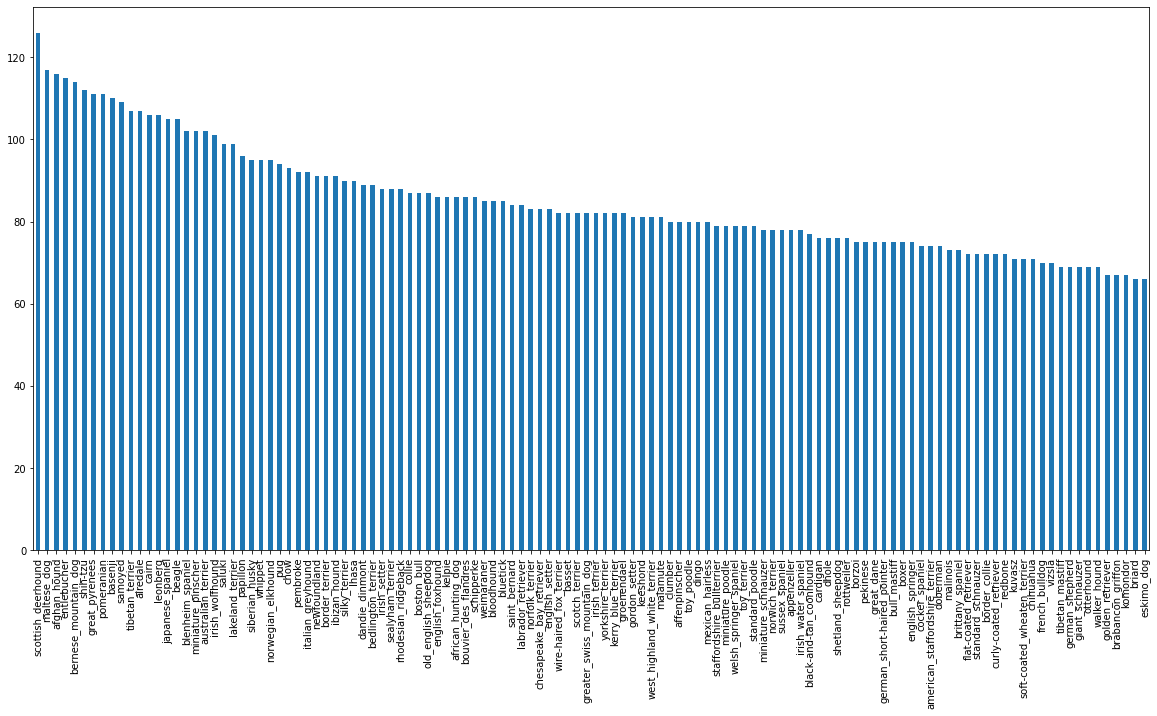

In [ ]:
labels_csv.breed.value_counts().plot.bar(figsize=(20,10));

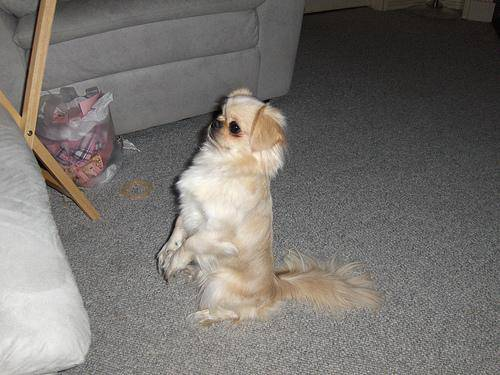

In [ ]:
# Viewing an image
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

### Getting images and all of their labels


In [ ]:
list(labels_csv["id"][:10])

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
filenames = list("drive/My Drive/Dog Vision/train/" + labels_csv["id"] +".jpg")

In [ ]:
filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
import os
os.listdir("drive/My Drive/Dog Vision/train/")[:5]

['e9fc775bd40d6d7273ff093fa12a0574.jpg',
 'e9d910ff8abc407c1536201210b40888.jpg',
 'f5171a2251d123f01566ace3a1107754.jpg',
 'eaa2b8ce4fd5320fdeceecbe804f08bb.jpg',
 'f67c86c7429bfe3a576c2468d243b29f.jpg']

In [ ]:
hi = pd.DataFrame(list(os.listdir("drive/My Drive/Dog Vision/train/")),labels_csv["breed"])
hi

0
breed                                                         
boston_bull               e9fc775bd40d6d7273ff093fa12a0574.jpg
dingo                     e9d910ff8abc407c1536201210b40888.jpg
pekinese                  f5171a2251d123f01566ace3a1107754.jpg
bluetick                  eaa2b8ce4fd5320fdeceecbe804f08bb.jpg
golden_retriever          f67c86c7429bfe3a576c2468d243b29f.jpg
...                                                        ...
borzoi                    0326d40cc2b35521f1f3e73cabcf2a23.jpg
dandie_dinmont            0296633efc21006e3ce2af7eaeff04f7.jpg
airedale                  0c2fdeb77e6e650e69ecca013c7e8e67.jpg
miniature_pinscher        0ab12906ac3a87b531c574a15e79c58a.jpg
chesapeake_bay_retriever  01b36cb1b80ab8c3a7d2b7128ad21bdc.jpg

[10222 rows x 1 columns]

In [ ]:
import os
print(len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames))

True


The above code is checking whether the length of `filenames` is equal to the number of actual files in the drive

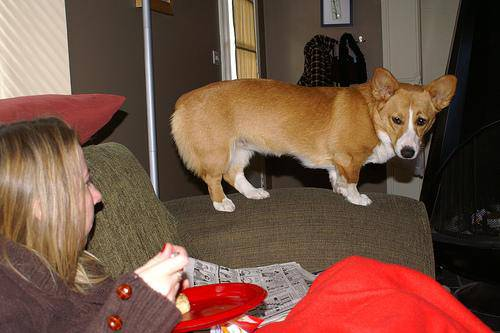

In [ ]:
Image(filenames[10000])

In [ ]:
labels_csv["breed"][10000]

'pembroke'

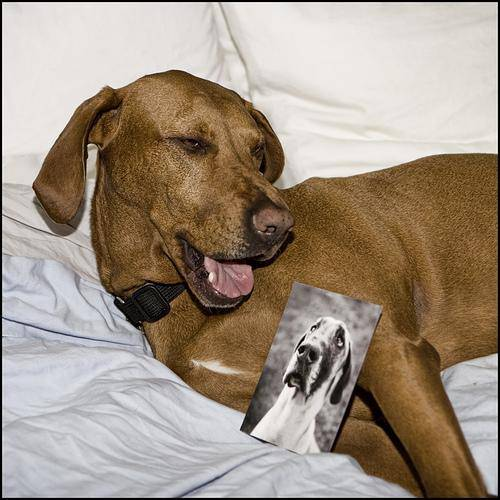

In [ ]:
Image(filenames[100])

In [ ]:
labels_csv["breed"][100]

'rhodesian_ridgeback'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
print(len(labels) == len(filenames))

NameError: ignored

In [ ]:
unique_labels = np.unique(labels)
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_labels

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(labels[0] == unique_labels)) # where in the unique_labels does the label occur
print(boolean_labels[0].argmax()) # where in boolean array does the label occur
print(boolean_labels[0].astype(int)) # turning boolean array into numbers


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# Setup x and y variables
x = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Splitting our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocessing Images (turning images into tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4.Normalize our `image` (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

The shape displays the (height, width, color_channel) of the image.

Image have pixels of various shades of RGB color (Red, Green, Blue).

Color_channel values vary from 0-255.

In [ ]:
image.max()

255

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

This is a tensor.

The difference between np array and tensors is that the latter can work faster on a GPU.

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

**Step 4** is called **normalising**. 

We convert color channels from 0-255 to 0-1.

This makes all the color_channels as floating point numbers.

The reason for doing this is to make computations on the data faster.

## Turning our data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.  

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (X & y) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is validation dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating valid data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),  # filepath
                                               tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If data is training dataset
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Create training and validation data
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating valid data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# We need to unbatch our data to visualise them
# 1. Train Data
train_images, train_labels = next(train_data.as_numpy_iterator()) # turning batches to numpy type
len(train_images), len(train_labels)

(32, 32)

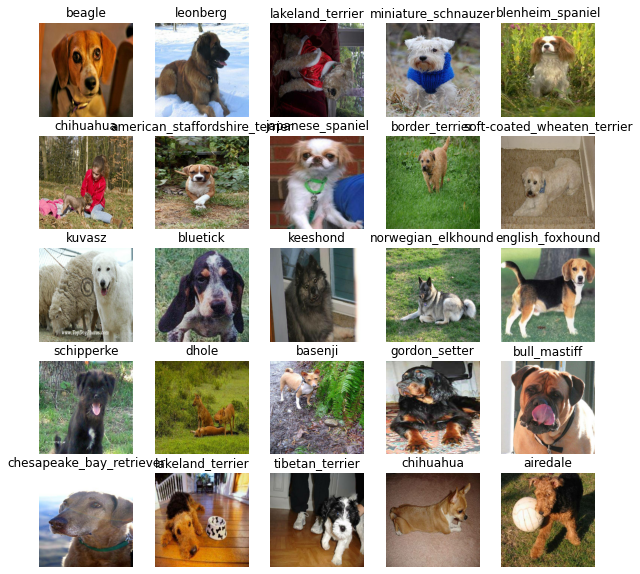

In [ ]:
show_25_images(train_images, train_labels)

In [ ]:
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

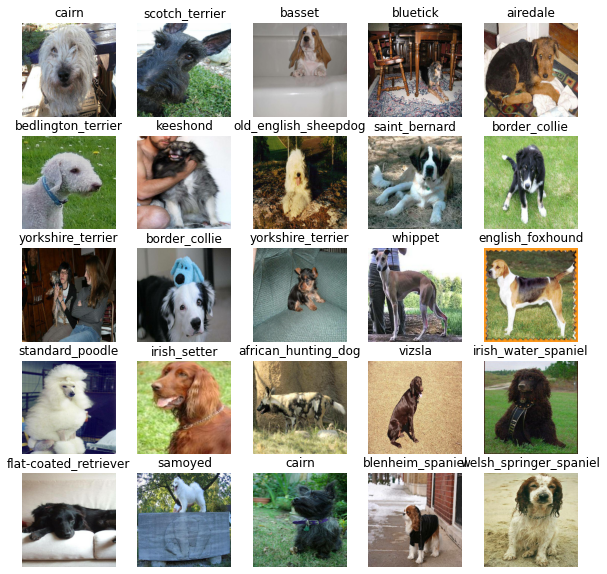

In [ ]:
# 2. Validation data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_labels) # i.e. 120

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ",MODEL_URL)
  
  # Setup the model layers
  model = tf.keras.Sequential([
            hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
            tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                  activation="softmax")  # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build a model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_4 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Which activation? Which loss to use?

In [ ]:
pd.DataFrame({"Binary Classification":["Activation: Sigmoid","Loss: BinaryCrossentropy"],
              "Multi class Classification":["Activation: Softmax","Loss: CategoricalCrossentropy"]})

Binary Classification     Multi class Classification
0       Activation: Sigmoid            Activation: Softmax
1  Loss: BinaryCrossentropy  Loss: CategoricalCrossentropy

### Creating layers
1. We tell tensorflow to create a sequential layer (linear stack of layers):
   
   * Using TensorFlow Hub we use transfer learning to use a pre-trained machine learning model (in this case, mobilenet_v2) using the MODEL_URL.
   This will be the first layer or the input layer.
2. Initially the image is of size (244,244,3). 
   * TensorFlow uses a series of mathematical calculations to resize the image (1,1,1280). 
   * But, we want the size of the image as the OUTPUT_SIZE i.e.120.
   *  Therefore,the Dense() function resizes the shape to our desired value. We then use the activation to transform the values. 
   * What `softmax` does is that it converts all the components in intervals of (0,1) which all add up to 1. This is the second layer (Output layer).

### Compiling our model
* Imagine you are participating in a hill descending contest but being blinfolded.
* Loss = height from the bottom of the hill.
* Therfore, the lesser the loss the more accurately the model is findng patterns in data.
* Your friend `Adam()` is at the bottom of the hill giving you instructions on how to descend.
*  Here Adam() is the optimizer meaning that he helps you to optimize your performance.
* Then, you will be evaluated on how well you perfromed using `accuracy`.
* Since, it is a multi-class classification problem the function we use to calculate loss is `CategoricalCrossentropy()`

### Build a model
We finally build a model taking in the size of the images i.e. (224, 244, 3).

## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)  # Number of epochs with no improvement after which training is stopped

In [ ]:
NUM_EPOCHS = 100  # Number of chances a model is given to look at the training set to find patterns is called epoch.

Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,  # how many training epochs to run before a new validation run is performed; in this after case every epoch
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 472s 19s/step - loss: 4.6178 - accuracy: 0.1025 - val_loss: 3.5668 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 6s 229ms/step - loss: 1.6632 - accuracy: 0.6900 - val_loss: 2.2458 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 6s 229ms/step - loss: 0.5732 - accuracy: 0.9388 - val_loss: 1.7344 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 6s 226ms/step - loss: 0.2550 - accuracy: 0.9862 - val_loss: 1.5501 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 6s 226ms/step - loss: 0.1454 - accuracy: 0.9975 - val_loss: 1.4639 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 6s 227ms/step - loss: 0.0991 - accuracy: 1.0000 - val_loss: 1.4127 - val_accuracy: 0.6400
Epoch 7/100
25/25 [=============================

1. The accuracy of the training data is 100% and the accuracy of validation data is not increasing anymore. 
2. This means that our model is finding patterns but is **overfitting**. 
3. This means that our model is not able to generalise. It can find patterns perfectly on training data but not that good on validation data

## Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

Reusing TensorBoard on port 6006 (pid 2035), started 5:27:43 ago. (Use '!kill 2035' to kill it.)

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 137ms/step


array([[0.00621338, 0.00584605, 0.00098066, ..., 0.00228379, 0.00158071,
        0.00274224],
       [0.00174579, 0.00326779, 0.00100549, ..., 0.01154018, 0.00183407,
        0.00513878],
       [0.08252187, 0.0011138 , 0.00129966, ..., 0.00011455, 0.00034539,
        0.0262509 ],
       ...,
       [0.0037529 , 0.00212161, 0.00103752, ..., 0.01271769, 0.00391152,
        0.00124585],
       [0.0181948 , 0.00095269, 0.00020297, ..., 0.00615651, 0.00497284,
        0.00538954],
       [0.00217941, 0.00162717, 0.00261358, ..., 0.00039925, 0.01506985,
        0.00048514]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val) , len(unique_labels)

(200, 120)

In [ ]:
predictions[0]

array([0.00621338, 0.00584605, 0.00098066, 0.0037753 , 0.00737838,
       0.01512363, 0.00057548, 0.01307966, 0.00290979, 0.0144142 ,
       0.00249259, 0.01583969, 0.01017663, 0.00054479, 0.02421667,
       0.00049188, 0.00100621, 0.01363297, 0.00162071, 0.00288608,
       0.00114044, 0.03858788, 0.02243933, 0.0007517 , 0.0075666 ,
       0.05246509, 0.0094398 , 0.00551214, 0.03421191, 0.04260448,
       0.00167982, 0.00030402, 0.02332908, 0.00124886, 0.0123335 ,
       0.00404298, 0.00873328, 0.00164092, 0.03161551, 0.00072219,
       0.03023644, 0.00207996, 0.00420405, 0.00737882, 0.00073746,
       0.00398848, 0.00508355, 0.00426153, 0.00492886, 0.0073157 ,
       0.00310304, 0.01359973, 0.00082515, 0.01026438, 0.02021177,
       0.01217472, 0.00025396, 0.00097979, 0.0002259 , 0.00232592,
       0.00103994, 0.00518059, 0.0038879 , 0.01024129, 0.0021987 ,
       0.00183124, 0.00497391, 0.04670545, 0.0022272 , 0.00155335,
       0.00701861, 0.00336574, 0.00056845, 0.00177735, 0.00163

In [ ]:
predictions[0].shape

(120,)

*  What this means is that there are 120 unique breeds.
* What `predict()` does is it calculates the probability of each image in the validation data being a particular breed in the `unique_labels`
* Therefore, the probability of each `val_data` image's breed being equal to those listed in `unique_labels`

**Proof:**Sum of all probabilities being equal or almost equal to 1.

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
# First prediction
index = 42
print(predictions[index])
print("Max value of (probability of prediction): ", np.max(predictions[index]))
print("Sum: ", np.sum(predictions[index]))
print("Max index: ", np.argmax(predictions[index]))
print("Predicted label: ", unique_labels[np.argmax(predictions[index])])

[0.01852429 0.00123988 0.00198009 0.009445   0.00314647 0.00752642
 0.00282927 0.00473914 0.00060808 0.00576351 0.00620179 0.00509073
 0.0013362  0.00754517 0.00611578 0.04402029 0.00239063 0.01531225
 0.01243588 0.00051402 0.00266939 0.00178977 0.00093071 0.00414774
 0.00707818 0.00105056 0.03776824 0.02961918 0.00848907 0.00220543
 0.0122139  0.00582902 0.00212499 0.00796576 0.00075713 0.01319279
 0.00045495 0.00951562 0.01047053 0.00514318 0.01353945 0.0066747
 0.00389068 0.00333773 0.01414808 0.00737032 0.01277306 0.00127342
 0.00421876 0.01426477 0.00436673 0.00240686 0.03012561 0.00304693
 0.00042259 0.0047982  0.00143732 0.00112458 0.00035838 0.01542599
 0.00358804 0.00698684 0.02350778 0.00720173 0.00497469 0.01716706
 0.00074105 0.01193888 0.00142794 0.0039467  0.00437451 0.00030754
 0.0010032  0.00360479 0.01472863 0.01874745 0.0011645  0.00073591
 0.00764427 0.01979595 0.00063875 0.01637376 0.00128465 0.00034648
 0.00841818 0.00329645 0.00140775 0.00392691 0.02172465 0.00985

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

Now since our validation data is still in a batch dataset, we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function to unbatch a batch dataset
def unbatch(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through the unbtched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images
Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [ ]:
def plot_breed(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_probs, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_probs)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Define the color
  if pred_label == true_label:
    color="green"
  else: 
    color="red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title(f"{pred_label} {np.max(pred_probs)*100:2.0f}% {true_label}",color=color)

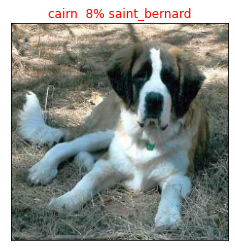

In [ ]:
plot_breed(predictions, val_labels, val_images, 8)

In [ ]:
unique_labels[np.argmax(predictions[1])]

'scotch_terrier'

In [ ]:
np.max(predictions[81])

0.24721687

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer 
* Find the prediction using get_pred_label() 
* Find the top 10:
  * Prediction probabilities indexes 
  * Prediction probabilities values 
  * Prediction labels 
* Plot the top 10 prediction probability values and labels, coloring the true label green 

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change the colour of the true labels
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(true_label == top_10_pred_labels)].set_color("green")

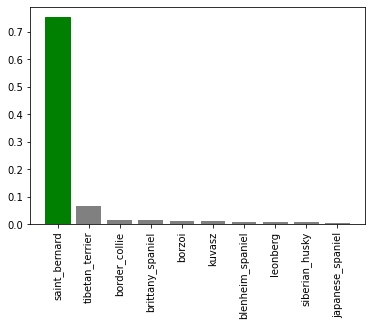

In [ ]:
plot_pred_conf(predictions, val_labels, 8)

In [ ]:
predictions[0]

array([1.26601779e-03, 1.54497247e-04, 2.58578628e-04, 6.63533167e-04,
       7.69932987e-04, 6.38538477e-05, 2.37601958e-02, 2.71661731e-04,
       2.57942360e-04, 2.27133906e-03, 5.27264492e-04, 1.77959912e-04,
       3.06071452e-04, 7.16219874e-05, 3.07886687e-04, 2.94020312e-04,
       1.24025682e-04, 1.86669454e-01, 5.98868828e-05, 3.43085936e-04,
       7.87114899e-04, 1.45952043e-04, 7.45919460e-05, 1.53431750e-03,
       2.67584346e-05, 2.01747433e-04, 2.75063992e-01, 1.05619321e-04,
       7.10850582e-04, 4.12993162e-04, 4.15769347e-04, 2.92235811e-04,
       4.97035915e-04, 1.73744003e-04, 1.26633473e-04, 2.51918714e-02,
       2.62869144e-05, 4.10764042e-04, 2.52771948e-04, 2.29612473e-04,
       1.65980146e-03, 3.07260707e-05, 5.93002886e-04, 5.19039284e-04,
       2.97754177e-05, 2.23223673e-04, 8.57864579e-05, 1.09889574e-04,
       4.01261525e-04, 1.54109485e-03, 1.20877608e-04, 8.09457386e-04,
       8.68507195e-04, 2.43328104e-05, 8.76462072e-05, 1.95827906e-05,
      

In [ ]:
predictions[0].argsort()

array([ 92,  55,  61,  53,  36, 118,  24,  63,  44,  41,  99, 107,  75,
        72,  18,  94,   5,  69,  13,  22,  46,  54, 101,  84,  60,  27,
        47,  50,  16,  34,  82,  21, 108,   1,  33,  11,  88,  25,  71,
        45, 111,  39,  91,  38,   8,   2, 110,   7, 115,  31,  15,  12,
        14, 113,  19,  86,  66,  87,  62,  48,  37,  29,  30,  56,  78,
        67,  32,  43,  98, 112,  10,  76,  95,  58,  42,   3,  28, 117,
         4,  20,  51,  52,  80,  64, 105, 104,   0,  74, 114,  23,  49,
        40,  85,  97,  96,  83,   9, 116,  90,  93, 119,  81,  89,  57,
       109,  68,  77,  79,  65, 100,   6,  35,  59, 103,  73, 106, 102,
        70,  17,  26])

In [ ]:
predictions[0].argsort()[-10:][::-1]

array([ 26,  17,  70, 102, 106,  73, 103,  59,  35,   6])

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.275064  , 0.18666945, 0.07415751, 0.07379724, 0.04844447,
       0.04592241, 0.04415473, 0.0285228 , 0.02519187, 0.0237602 ],
      dtype=float32)

In [ ]:
np.max(predictions[0])

0.275064

In [ ]:
unique_labels[predictions[0].argsort()[-10:][::-1]]

array(['cairn', 'border_terrier', 'lhasa', 'silky_terrier',
       'standard_schnauzer', 'maltese_dog', 'soft-coated_wheaten_terrier',
       'irish_wolfhound', 'dandie_dinmont', 'australian_terrier'],
      dtype=object)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

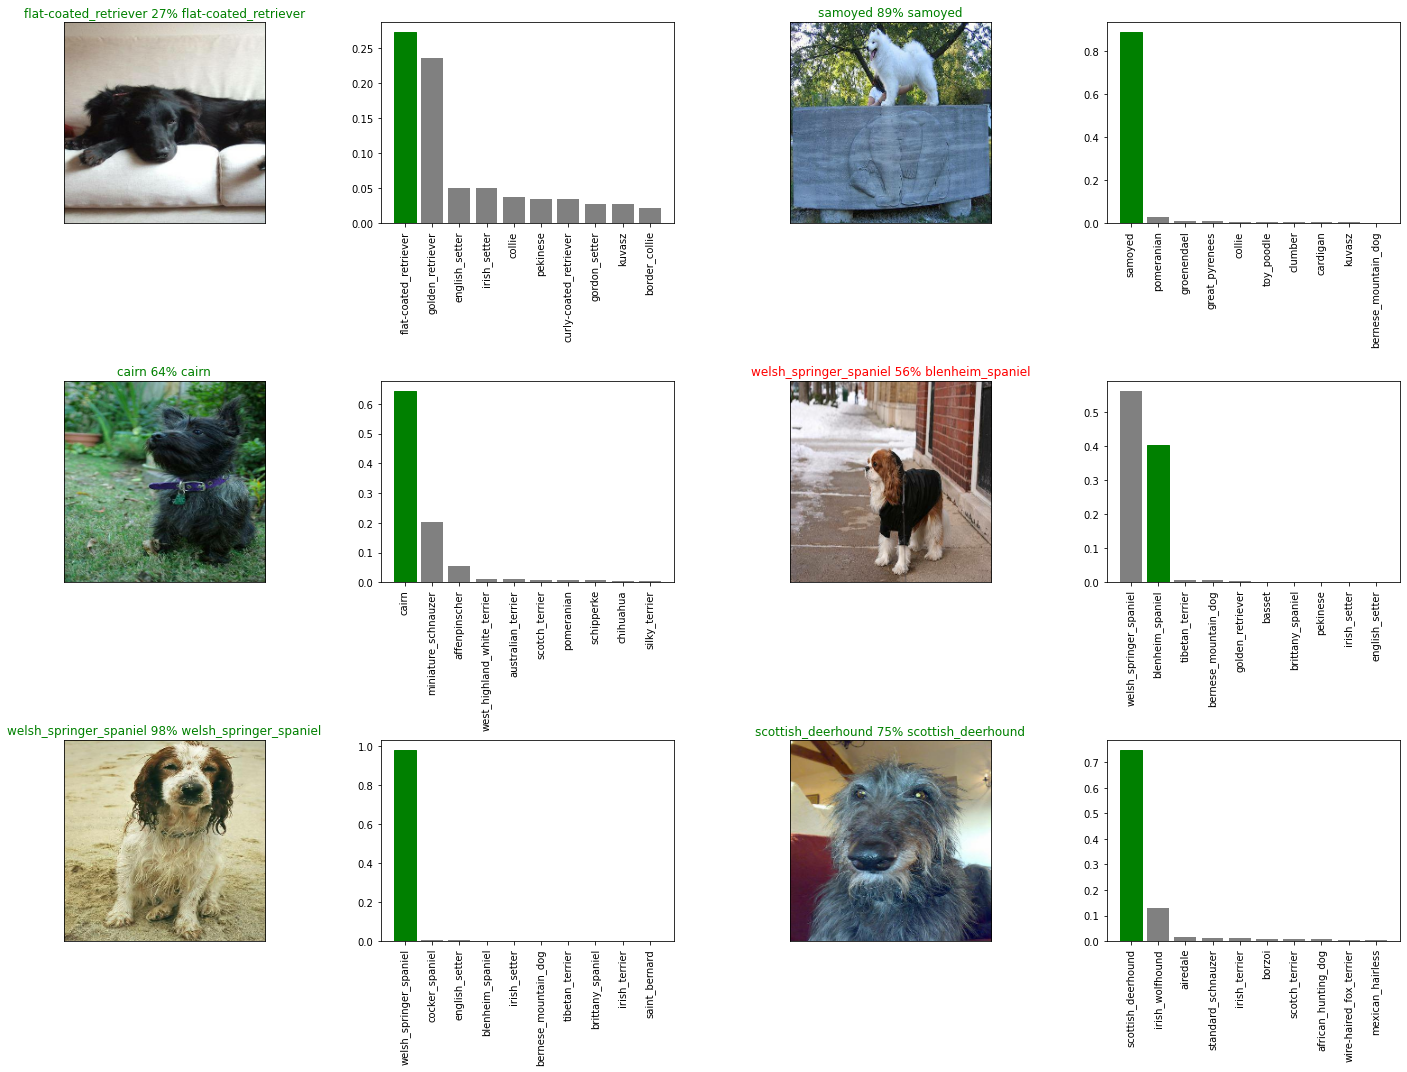

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_breed(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%h%m%s"))
  model_path = modeldir + "-" + suffix + ".h5" # extension for saving format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
   """
  Loads a saved model from a specified path.
  """
   print(f"Loading saved model from: {model_path}")
   model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer":hub.KerasLayer})
   return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200514-May051589456917-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200514-May051589456917-1000-images-mobilenetv2-Adam.h5'

In [ ]:
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200513-May051589371534-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200513-May051589371534-1000-images-mobilenetv2-Adam.h5


## Training model on full data

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(x,y)

Creating training data batches...


In [ ]:
# Create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

320/320 [==============================] - 6118s 19s/step - loss: 1.3324 - accuracy: 0.6718
Epoch 2/100
320/320 [==============================] - 62s 193ms/step - loss: 0.4014 - accuracy: 0.8798
Epoch 3/100
320/320 [==============================] - 62s 193ms/step - loss: 0.2382 - accuracy: 0.9354
Epoch 4/100
320/320 [==============================] - 62s 195ms/step - loss: 0.1559 - accuracy: 0.9622
Epoch 5/100
320/320 [==============================] - 61s 192ms/step - loss: 0.1065 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 62s 194ms/step - loss: 0.0775 - accuracy: 0.9861
Epoch 7/100
320/320 [==============================] - 62s 193ms/step - loss: 0.0582 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 61s 192ms/step - loss: 0.0474 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 62s 195ms/step - loss: 0.0374 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 61s 192ms/step - los

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200514-May051589466299-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200514-May051589466299-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200514-May051589466299-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200514-May051589466299-full-image-set-mobilenetv2-Adam.h5


## Make predictions on test data
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. 
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5] 

['drive/My Drive/Dog Vision/test/f1dcabbeb1dbebb326a4b029b6f8b188.jpg',
 'drive/My Drive/Dog Vision/test/efaa7438a6c3bdf92f90539a1fff55fe.jpg',
 'drive/My Drive/Dog Vision/test/f2dd8cf1ced495252a890e6633b65018.jpg',
 'drive/My Drive/Dog Vision/test/f10241d199251db359961e814733efc5.jpg',
 'drive/My Drive/Dog Vision/test/e92455b9e6291d0f192f23ccd4e0be3a.jpg']

In [ ]:
# Create test data batches
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 62s 191ms/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
os.listdir(test_path)

['f1dcabbeb1dbebb326a4b029b6f8b188.jpg',
 'efaa7438a6c3bdf92f90539a1fff55fe.jpg',
 'f2dd8cf1ced495252a890e6633b65018.jpg',
 'f10241d199251db359961e814733efc5.jpg',
 'e92455b9e6291d0f192f23ccd4e0be3a.jpg',
 'e8eca3dc497d4bb15b0254bc9f56cdd7.jpg',
 'ea1039f3869357b53abf4ace351218a6.jpg',
 'f44005bd8019c5b9fb3ba2216e5d2af8.jpg',
 'ed3b2e79859710376b7a91379234b1ec.jpg',
 'eec15026b5af233fa79dfb6081e1f339.jpg',
 'e9d585ce5dc29b4e9aa6a7332ddfa983.jpg',
 'eb48e06416db42a71d5c232191fec3a0.jpg',
 'ef4c9b0875ec51068b2720a01fa36b65.jpg',
 'ea5a0fb0d92c07b2e14da4dcd0d48c45.jpg',
 'e8763575a23f1e1a86788b82bd105f07.jpg',
 'f12b509213db8bb0a721fcd228b31f0e.jpg',
 'efc4b489fc15ff97a50536c71029a8b1.jpg',
 'eac3503b463e275d9f3053b8fcd5a58a.jpg',
 'f300694670b4219cf9e8f23306ae3407.jpg',
 'fd3e53915d17804c9206f51f3639e9c3.jpg',
 'ff71c0a7a71d994884c9f92457f0eda8.jpg',
 'f82a903b13fb1d4331d889847d93259f.jpg',
 'f8f3c8903f904242b099f1fa4472ff02.jpg',
 'fd9a41c9a7e713e8ff5ffac23fed60e8.jpg',
 'ff194ab5709702

In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Making predictions on custom images
To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

**Note:** Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)